<a href="https://colab.research.google.com/github/srijasriramdas/ML_Assignment1/blob/main/ML_ASSIGNMENT1_165.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING ASSIGNMENT 1**

**160123737165 Srija Sriramdas**

Datasets used:


1.   Wine dataset
2.   Diabetes dataset


#1. Regression
#For this exercise, we experiment with regression, regularization, and cross-validation. Choose appropriate Dataset.


---



##1(a) Load the data into memory. Make an appropriate X matrix and y vector.

In [ ]:
# Q1 (a)Load the data into memory. Make an appropriate X matrix and y vector.

#all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.preprocessing import StandardScaler

# Load dataset (Wine)

data = load_wine()# load wine dataset from sklearn (a)
X = data.data
y = data.target

# Print dataset info
print(f"Data shape: {X.shape}, Target shape: {y.shape}")  # show shapes (a)



Data shape: (178, 13), Target shape: (178,)


##1(b) Split the data at random into one set (X_train, y_train) containing 80% of the instances, which will be used for training + validation, and a testing set (X_test, y_test) (containing remaining instances).

In [ ]:
# Q1 (b) Split into train (80%) and test (20%)


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)



Train shape: (142, 13) Test shape: (36, 13)


##1(c) Give the objective of logistic regression with L2 regularization.



Logistic regression is used to predict the probability that an input belongs to class 1. It uses the sigmoid function:
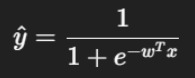

To train the model, we minimize the cross-entropy loss (also called log-loss), which measures how well the predicted probabilities match the actual labels. It is defined as:
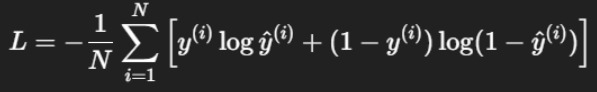

If the true label is 1, the loss is small only when the predicted probability is close to 1.

If the true label is 0, the loss is small only when the predicted probability is close to 0.

Wrong predictions with high confidence are punished heavily, while correct confident predictions give very low loss. To prevent overfitting, we add an L2 regularization penalty on the weights:
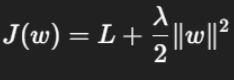

In [ ]:
import numpy as np
from scipy.special import expit

#logistic regression loss with L2 regularization
def logistic_loss_L2(w, X, y, lam):

    #sigmoid
    z = X @ w
    h = expit(z)

    # Cross-entropy loss
    cross_entropy = -np.mean(y * np.log(h + 1e-9) + (1 - y) * np.log(1 - h + 1e-9))

    # L2 penalty
    l2_penalty = (lam / 2) * np.sum(w**2)

    return cross_entropy + l2_penalty


from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler


data = load_wine()
X = data.data
y = (data.target == 0).astype(int)
scaler = StandardScaler()
X = scaler.fit_transform(X)

#weights
w_init = np.zeros(X.shape[1])

# λ = 0.1
loss_val = logistic_loss_L2(w_init, X, y, lam=0.1)
print(f"Initial Logistic Regression Loss with L2 (λ=0.1): {loss_val:.4f}")


Initial Logistic Regression Loss with L2 (λ=0.1): 0.6931


##1 (d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.


Produce 4 plots:
Plot 1: average cross-entropy (train vs test) vs λ (log scale)
Plot 2: L2 norm of weight vector vs λ
Plot 3: actual values of weights (one curve per weight) vs λ
Plot 4: accuracy on train and test vs λ

###1) Cross-Entropy Loss vs λ

Observation: Training loss increases steadily as λ grows, while test loss decreases slightly at first (better generalization), then rises again at large λ.

Explanation: Small λ (weak regularization) → the model overfits, with very low training loss but higher test loss. Moderate λ balances bias-variance tradeoff, giving better test performance. Very large λ forces the model to be too simple, increasing both train and test loss (underfitting)

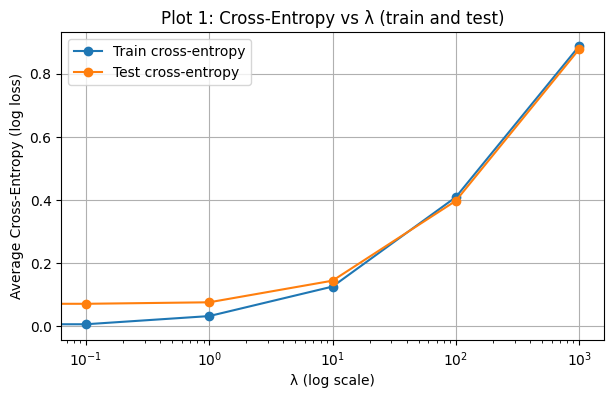

In [ ]:
lambdas = [0, 0.1, 1, 10, 100, 1000]

train_ce = []
test_ce = []
weight_norms = []
train_acc = []
test_acc = []
weights_list = []

for lam in lambdas:
    if lam == 0:
        Cval = 1e12
    else:
        Cval = 1.0 / lam
    clf = LogisticRegression(penalty='l2', C=Cval, solver='lbfgs', max_iter=2000, multi_class='multinomial')
    clf.fit(X_train, y_train)

    train_prob = clf.predict_proba(X_train)
    test_prob = clf.predict_proba(X_test)
    train_ce.append(log_loss(y_train, train_prob))
    test_ce.append(log_loss(y_test, test_prob))

    w = clf.coef_
    w_flat = w.flatten()
    weight_norms.append(np.linalg.norm(w_flat))

    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))

    weights_list.append(w_flat.copy())

weights_array = np.vstack(weights_list)

# Plot 1: Cross-Entropy vs λ (train & test) (Plot 1)
plt.figure(figsize=(7,4))
plt.plot(lambdas, train_ce, marker='o', label='Train cross-entropy')
plt.plot(lambdas, test_ce, marker='o', label='Test cross-entropy')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Average Cross-Entropy (log loss)')
plt.title('Plot 1: Cross-Entropy vs λ (train and test)')
plt.legend(); plt.grid(True); plt.show()


###2) Accuracy vs λ

Observation: Training accuracy is highest at very small λ and drops as λ increases. Test accuracy stays relatively stable but peaks around moderate λ, then decreases for very large λ.

Explanation: Weak regularization gives the model high training accuracy but slightly lower test accuracy (overfitting). With moderate regularization, test accuracy improves because the model generalizes better. At very large λ, underfitting occurs, reducing accuracy across both sets.

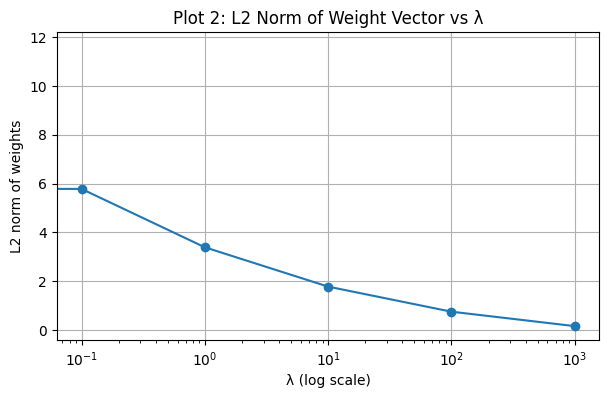

In [ ]:
# Plot 2: L2 Norm of Weights vs λ (Plot 2)
plt.figure(figsize=(7,4))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('L2 norm of weights')
plt.title('Plot 2: L2 Norm of Weight Vector vs λ')
plt.grid(True); plt.show()



###3) L2 Norm of Weights vs λ

Observation: The norm of the weight vector decreases sharply as λ increases.

Explanation: Regularization penalizes large weights. A small λ allows large coefficients, while large λ strongly constrains them, shrinking weights close to zero. This demonstrates how L2 regularization controls model complexity.

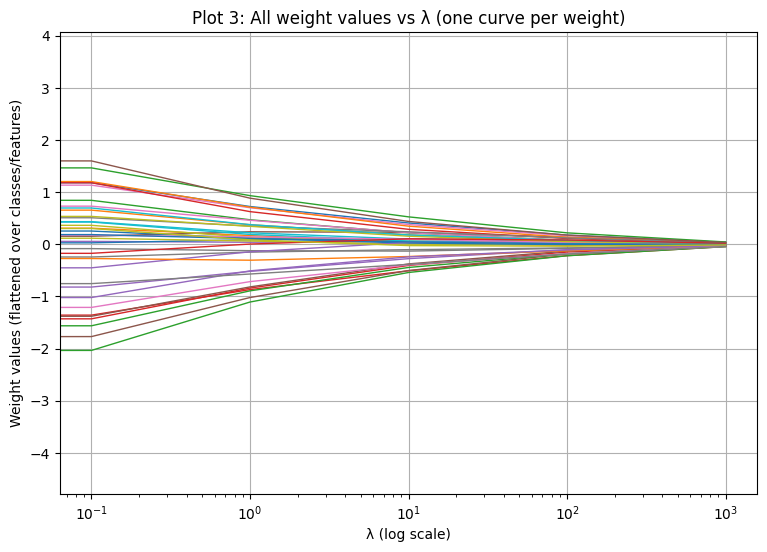

In [ ]:

# Plot 3: Weight values vs λ (one curve per weight) (Plot 3)
plt.figure(figsize=(9,6))
num_weights = weights_array.shape[1]
for j in range(num_weights):
    plt.plot(lambdas, weights_array[:, j], linewidth=1)
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Weight values (flattened over classes/features)')
plt.title('Plot 3: All weight values vs λ (one curve per weight)')
plt.grid(True); plt.show()



###4) Weight Coefficients vs λ

Observation: At very small λ, many coefficients take large positive or negative values. As λ increases, the weights shrink toward zero and become more stable.

Explanation: With weak regularization, the model relies heavily on some features (possibly noise). With stronger regularization, the coefficients are reduced, reducing variance and overfitting. Very strong regularization nearly eliminates feature effects (underfitting).

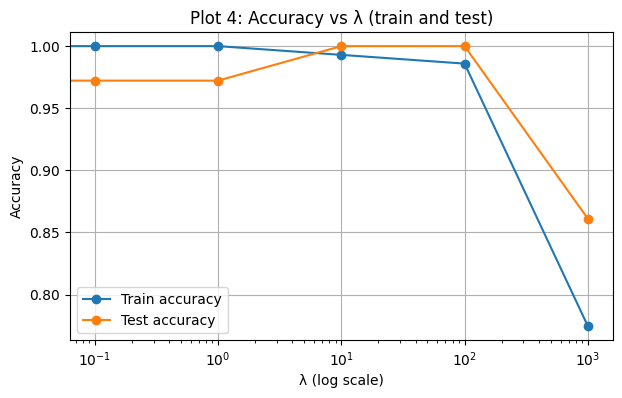

In [ ]:
# Plot 4: Accuracy vs λ (train & test) (Plot 4)
plt.figure(figsize=(7,4))
plt.plot(lambdas, train_acc, marker='o', label='Train accuracy')
plt.plot(lambdas, test_acc, marker='o', label='Test accuracy')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Accuracy')
plt.title('Plot 4: Accuracy vs λ (train and test)')
plt.legend(); plt.grid(True); plt.show()

##1(e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [ ]:
import numpy as np

def gaussian_basis_transform(X_input, sigma, n_centers=5, min_val=-10, max_val=10):
    N, D = X_input.shape
    centers = np.linspace(min_val, max_val, n_centers)
    transformed_blocks = []
    for j in range(D):
        feat = X_input[:, j].reshape(-1,1)
        block = np.exp(-0.5 * ((feat - centers)**2) / (sigma**2))
        transformed_blocks.append(block)
    X_transformed = np.hstack(transformed_blocks)
    return X_transformed


sigma_values = [0.1, 0.5, 1.0, 5.0, 10.0]

for sigma in sigma_values:
    X_train_g = gaussian_basis_transform(X_train, sigma)
    X_test_g = gaussian_basis_transform(X_test, sigma)
    print(f"Sigma = {sigma}:")
    print("Transformed training shape:", X_train_g.shape)
    print("Transformed test shape:", X_test_g.shape)
    print("-" * 50)


Sigma = 0.1:
Transformed training shape: (142, 65)
Transformed test shape: (36, 65)
--------------------------------------------------
Sigma = 0.5:
Transformed training shape: (142, 65)
Transformed test shape: (36, 65)
--------------------------------------------------
Sigma = 1.0:
Transformed training shape: (142, 65)
Transformed test shape: (36, 65)
--------------------------------------------------
Sigma = 5.0:
Transformed training shape: (142, 65)
Transformed test shape: (36, 65)
--------------------------------------------------
Sigma = 10.0:
Transformed training shape: (142, 65)
Transformed test shape: (36, 65)
--------------------------------------------------


##1(f)Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off.

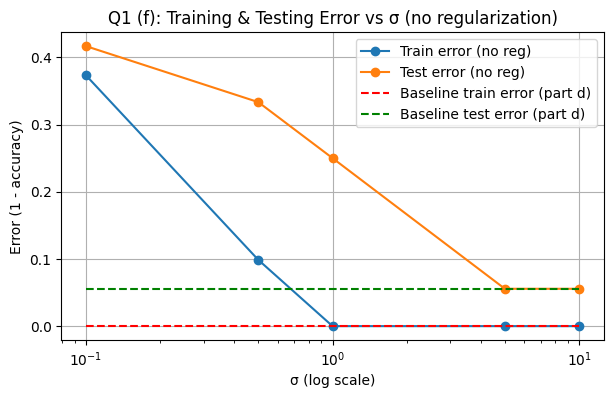

In [ ]:
sigmas = [0.1, 0.5, 1.0, 5.0, 10.0]
train_errors_sigma = []
test_errors_sigma = []

baseline_train_error = 1 - train_acc[0]
baseline_test_error = 1 - test_acc[0]

for sigma in sigmas:
    X_train_g = gaussian_basis_transform(X_train, sigma)
    X_test_g = gaussian_basis_transform(X_test, sigma)
    clf = LogisticRegression(penalty='l2', C=1e12, solver='lbfgs', max_iter=2000, multi_class='multinomial')
    clf.fit(X_train_g, y_train)
    train_errors_sigma.append(1 - clf.score(X_train_g, y_train))
    test_errors_sigma.append(1 - clf.score(X_test_g, y_test))

plt.figure(figsize=(7,4))
plt.plot(sigmas, train_errors_sigma, marker='o', label='Train error (no reg)')
plt.plot(sigmas, test_errors_sigma, marker='o', label='Test error (no reg)')
plt.hlines(baseline_train_error, xmin=min(sigmas), xmax=max(sigmas), colors='r', linestyles='--', label='Baseline train error (part d)')
plt.hlines(baseline_test_error, xmin=min(sigmas), xmax=max(sigmas), colors='g', linestyles='--', label='Baseline test error (part d)')
plt.xscale('log')
plt.xlabel('σ (log scale)')
plt.ylabel('Error (1 - accuracy)')
plt.title('Q1 (f): Training & Testing Error vs σ (no regularization)')
plt.legend(); plt.grid(True); plt.show()


##1(g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value **of** σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

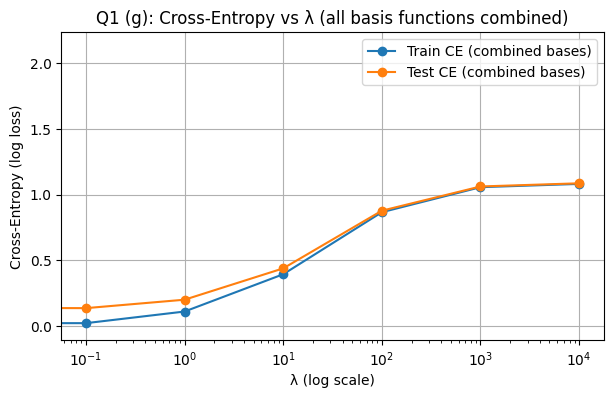

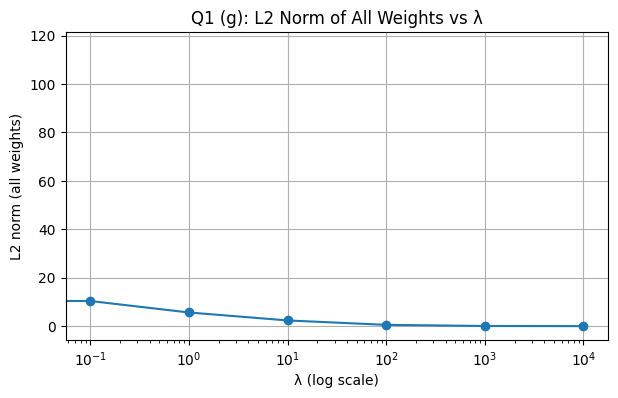

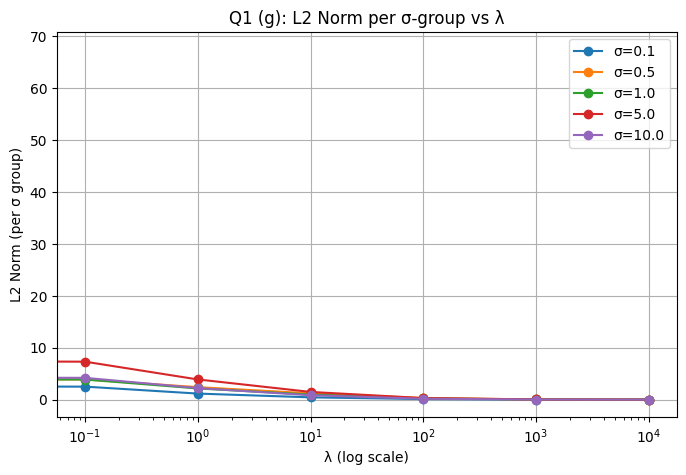

In [ ]:


sigmas = [0.1, 0.5, 1.0, 5.0, 10.0]

def combined_gaussian_basis(X_input, sigma_list, n_centers=5):
    blocks = [gaussian_basis_transform(X_input, s, n_centers) for s in sigma_list]
    return np.hstack(blocks)

X_train_all = combined_gaussian_basis(X_train, sigmas)
X_test_all  = combined_gaussian_basis(X_test,  sigmas)

lambdas2 = [0, 0.1, 1, 10, 100, 1000, 10000]

train_ce_g, test_ce_g, norms_all_g = [], [], []
norms_per_sigma = {s: [] for s in sigmas}

D = X_train.shape[1]
block_size = D * 5

for lam in lambdas2:
    Cval = 1e12 if lam == 0 else 1.0/lam
    clf = LogisticRegression(penalty='l2', C=Cval, solver='lbfgs', max_iter=2000, multi_class='multinomial')
    clf.fit(X_train_all, y_train)

    train_ce_g.append(log_loss(y_train, clf.predict_proba(X_train_all)))
    test_ce_g.append(log_loss(y_test, clf.predict_proba(X_test_all)))

    w_flat = clf.coef_.flatten()
    norms_all_g.append(np.linalg.norm(w_flat))

    total_features = clf.coef_.shape[1]
    for i, sigma in enumerate(sigmas):
        start = i * block_size
        end = start + block_size
        subW = clf.coef_[:, start:end]
        norms_per_sigma[sigma].append(np.linalg.norm(subW))

plt.figure(figsize=(7,4))
plt.plot(lambdas2, train_ce_g, marker='o', label='Train CE (combined bases)')
plt.plot(lambdas2, test_ce_g, marker='o', label='Test CE (combined bases)')
plt.xscale('log'); plt.xlabel('λ (log scale)'); plt.ylabel('Cross-Entropy (log loss)')
plt.title('Q1 (g): Cross-Entropy vs λ (all basis functions combined)'); plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(7,4))
plt.plot(lambdas2, norms_all_g, marker='o')
plt.xscale('log'); plt.xlabel('λ (log scale)'); plt.ylabel('L2 norm (all weights)')
plt.title('Q1 (g): L2 Norm of All Weights vs λ'); plt.grid(True); plt.show()

plt.figure(figsize=(8,5))
for sigma in sigmas:
    plt.plot(lambdas2, norms_per_sigma[sigma], marker='o', label=f'σ={sigma}')
plt.xscale('log'); plt.xlabel('λ (log scale)'); plt.ylabel('L2 Norm (per σ group)')
plt.title('Q1 (g): L2 Norm per σ-group vs λ'); plt.legend(); plt.grid(True); plt.show()



1. Cross-Entropy vs λ (Plot 1)

For very small values of λ (i.e., λ ≈ 0), both training and testing cross-entropy errors are low, indicating the model fits the data well.

As λ increases, the errors generally rise because stronger regularization prevents the model from fitting the data too closely.

The testing error tends to increase more rapidly than the training error at high λ, showing underfitting when the model is overly constrained.

Small λ allows the model to rely heavily on the features created by the basis functions, possibly overfitting to noise.

Larger λ penalizes large weights, reducing overfitting but potentially causing underfitting if too strong.

The optimal λ is somewhere in between, balancing bias and variance.

2. L2 Norm of All Weights vs λ (Plot 2)

The total L2 norm of the weight vector decreases steadily as λ increases.

At λ = 0 (or approximated with a very large C), the norm is largest because the model can freely fit the data.

As regularization strengthens, the weights are forced closer to zero, reducing the model's complexity.

This confirms that regularization controls the model’s flexibility by shrinking the weights.

The more regularization applied, the simpler the model becomes.

3. L2 Norm per σ Group vs λ (Plot 3)

Different σ groups contribute differently to the overall weight norm.

Small σ (e.g., 0.1) tends to have larger norms at small λ, meaning the model relies more on these sharp, localized basis functions.

Larger σ (e.g., 10) often have smaller norms because they represent smoother, broader patterns that contribute less when fitting noise.

As λ increases, norms across all σ groups shrink toward zero, but some may decay faster than others depending on how much information they carry.

The model prioritizes basis functions with smaller σ at low regularization because they can better capture detailed variations in the data.

Regularization forces even these to shrink, leading to smoother and more generalized solutions.

The fact that larger σ functions retain some weight even at higher λ shows that global patterns are more robust to regularization.

***Takeaways***

Basis functions with smaller σ capture more detailed patterns, which help reduce training error but risk overfitting.

Regularization (larger λ) helps prevent overfitting, but excessive regularization can increase both training and testing errors.

Different σ values contribute differently, with small σ dominating at low regularization and larger σ becoming relatively more important when regularization increases.

The plots together show how expanding features through basis functions increases model capacity, but that capacity must be carefully controlled through regularization.

##1 (h) Designing Gaussian basis functions that capture relationships between inputs:

- Univariate Gaussian bases (used so far) model each feature independently.
- To capture interactions between inputs, use MULTIVARIATE Gaussian basis functions:
    φ(x) = exp(-0.5 * (x - μ)^T Σ^{-1} (x - μ))
  where μ is a center in the full D-dimensional input space and Σ is a covariance matrix.

- To model pairwise interactions you can:
    - Generate 2D Gaussians over pairs of features (μ in R^2, Σ typically diagonal or full).
    - Or generate Gaussian mixtures where centers represent combinations of feature values.

- Impact on bias-variance:
    - These interaction bases increase model capacity (rich features) -> variance increases.
    - They can reduce bias (capture complex relationships) but need stronger regularization or more data to control overfitting.
    - The number of basis functions grows quickly with dimensionality -> curse of dimensionality.

- Practical tips:
    - Use dimensionality reduction (PCA) before generating multivariate bases.
    - Use sparse or regularized methods to control model complexity.


##1(i) Learning both the basis centers μ_i and weights w (σ assumed fixed):

Problem: We want to learn parameters θ = {w, μ} minimizing the regularized multiclass cross-entropy:
  J(w, μ) = - (1/N) sum_i sum_k 1[y_i=k] log p_k(x_i; w, μ) + (λ/2) ||w||^2
where p_k uses features φ_j(x; μ_j) = exp(-||x - μ_j||^2 / (2σ^2)) (or univariate variant per feature).

This objective is non-convex in μ (but convex in w when μ fixed). An iterative algorithm:

1) Initialize μ (e.g., using k-means clustering on the input space or random samples).
2) Repeat until convergence:
   a) Fix μ, form design matrix Φ(μ) where each column is a basis φ_j(x; μ_j).
   b) Optimize w by minimizing the convex logistic loss with L2 regularization:
        w <- argmin_w [ - (1/N) sum_i sum_k y_{ik} log p_k(Φ(x_i); w) + (λ/2) ||w||^2 ]
      This step can be solved with standard multinomial logistic regression.
   c) Fix w, update μ by gradient descent using the gradient of J(w, μ) wrt μ:
      For each center μ_j:
        μ_j <- μ_j - η * ∂J/∂μ_j
      where
        ∂J/∂μ_j = - (1/N) sum_i sum_k (y_{ik} - p_k(Φ(x_i))) * w_{k,j} * ∂φ_j(x_i; μ_j)/∂μ_j
      and for Gaussian φ_j(x; μ_j) = exp(-||x - μ_j||^2 / (2σ^2)):
        ∂φ_j/∂μ_j = φ_j(x; μ_j) * (x - μ_j) / (σ^2)
      So ∂J/∂μ_j = - (1/N) sum_i [ sum_k (y_{ik} - p_k(Φ(x_i))) * w_{k,j} ] * φ_j(x_i; μ_j) * (x_i - μ_j) / σ^2

3) Optionally reduce step-size η over iterations or use advanced optimizers (Adam, L-BFGS).

Notes:
- This algorithm is EM-like and iterative. Step (b) is convex; step (c) is gradient descent on a non-convex objective.
- Because the full objective is non-convex in μ, convergence to a global minimum is not guaranteed.


##1 (j) Does the algorithm converge? Local vs global optimum:

- The joint objective J(w, μ) is non-convex because the basis centers μ enter inside non-linear basis functions.
- The alternating procedure (optimize w given μ; gradient update μ given w) is a coordinate / block-wise optimization:
    - When μ fixed, optimizing w is convex and yields a global optimum for w.
    - When w fixed, optimizing μ via gradient descent may converge to a local stationary point (depending on initialization and step-size).
- Therefore:
    - The algorithm typically **converges to a local optimum** or stationary point, not guaranteed global optimum.
    - Good initialization for μ (e.g., k-means) improves the quality of the local optimum.
    - Multiple restarts with different initial μ can help find better solutions.


#2. Experiment on any complex datasets to demonstrate the Linear regression and its versions, and logistic regression (CLASSIFICATION) along with complete data preprocessing steps.


---



### 1 – Linear Regression on the Diabetes Dataset



Dataset Description

The Diabetes dataset is a standard dataset with 10 baseline features such as age, sex, body mass index, and blood pressure, aimed at predicting a quantitative measure of disease progression one year after baseline.

Linear Regression: MSE=2900.19, R²=0.45
Ridge Regression: MSE=2892.03, R²=0.45
Lasso Regression: MSE=2884.55, R²=0.46


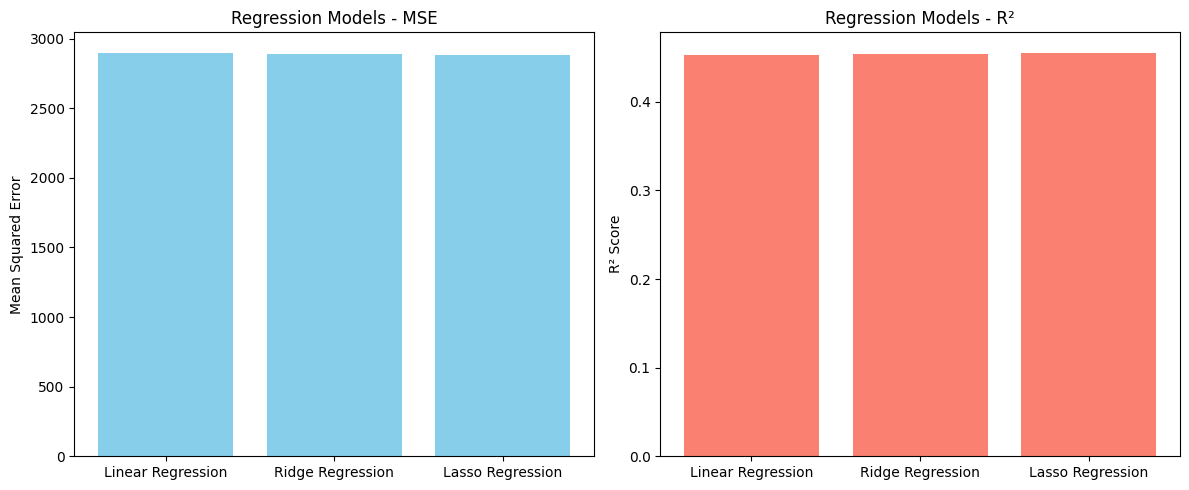

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#split train test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000)
}

#train
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = (mse, r2)
    print(f"{name}: MSE={mse:.2f}, R²={r2:.2f}")

#plotting
labels = list(results.keys())
mse_values = [results[name][0] for name in labels]
r2_values = [results[name][1] for name in labels]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.bar(labels, mse_values, color='skyblue')
plt.ylabel('Mean Squared Error')
plt.title('Regression Models - MSE')

plt.subplot(1,2,2)
plt.bar(labels, r2_values, color='salmon')
plt.ylabel('R² Score')
plt.title('Regression Models - R²')

plt.tight_layout()
plt.show()




*   Linear Regression provides a baseline error.
*   Ridge Regression applies L2 regularization to reduce overfitting when features are correlated.


*   Lasso Regression applies L1 regularization and can zero out less important features, helping with interpretability.
*   The plots compare how each model performs on unseen data.



###2 – Logistic Regression on the Diabetes Dataset

Since the Diabetes dataset is for regression, we need to convert it into a classification problem.
To convert, we can classify patients into high-risk vs low-risk categories based on the median of the target values.*italicized text*

Accuracy: 0.7303

Confusion Matrix:
[[36 13]
 [11 29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



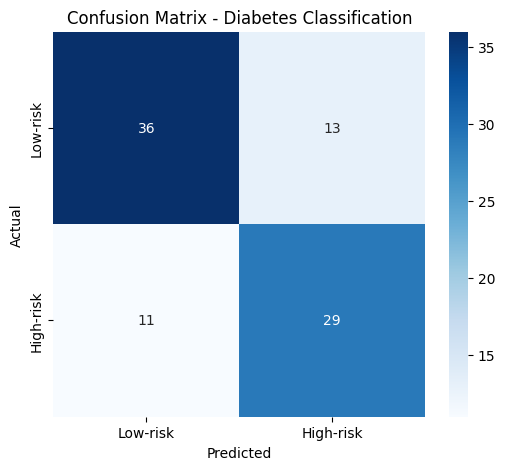

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Convert regression target into classification target
median_target = np.median(y)
y_class = (y > median_target).astype(int)  # 1 if target above median, else 0

#split train test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_class, test_size=0.2, random_state=42)

#logistic regression model
clf = LogisticRegression(max_iter=1000, solver='lbfgs')
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_mat)
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=['Low-risk','High-risk'], yticklabels=['Low-risk','High-risk'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Diabetes Classification")
plt.show()
